2025-09-30 05:39:11.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 05:39:11.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 05:39:11.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Saving bus.jpg to bus.jpg


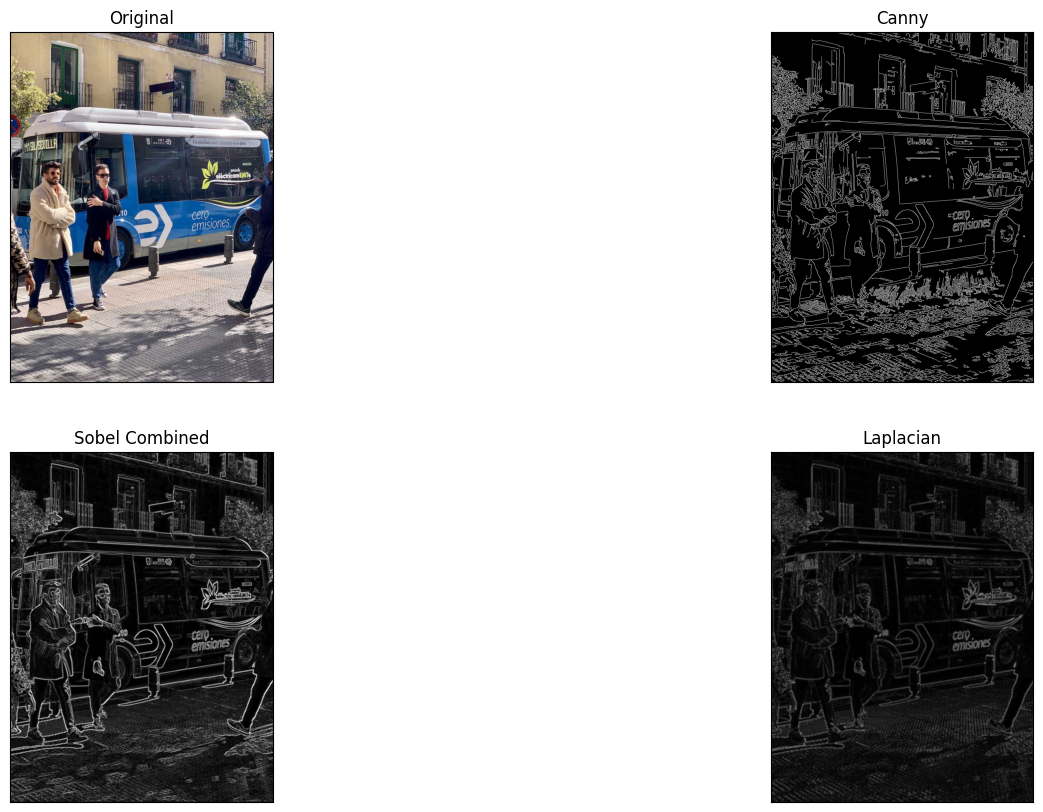

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# 1. Unggah Gambar menggunakan widget Colab
st.subheader("Unggah Gambar")
uploaded = files.upload()

if uploaded:
    # Ambil nama file yang diunggah (biasanya hanya ada satu)
    filename = next(iter(uploaded))

    # Baca gambar dari byte
    image_bytes = uploaded[filename]
    img_pil = Image.open(BytesIO(image_bytes))

    # Konversi ke array NumPy
    img_bgr = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

    # Konversi ke Grayscale dan Blur
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # -----------------------------------------------------
    ## Deteksi Tepi

    # Canny
    canny_edges = cv2.Canny(img_blur, 50, 150) # T1=50, T2=150

    # Sobel X
    sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
    abs_sobelx = cv2.convertScaleAbs(sobelx)

    # Sobel Y
    sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
    abs_sobely = cv2.convertScaleAbs(sobely)

    # Sobel Combined
    sobel_combined = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

    # Laplacian
    laplacian = cv2.Laplacian(img_blur, cv2.CV_64F)
    abs_laplacian = cv2.convertScaleAbs(laplacian)
    # -----------------------------------------------------

    # -----------------------------------------------------
    ## Tampilkan Hasil dengan Matplotlib
    titles = ['Original', 'Canny', 'Sobel Combined', 'Laplacian']
    # Gunakan img_pil (RGB) untuk gambar asli agar warna terlihat benar
    images = [img_pil, canny_edges, sobel_combined, abs_laplacian]

    plt.figure(figsize=(18, 10))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        # Gunakan 'gray' cmap untuk hasil deteksi tepi
        cmap = 'gray' if i > 0 else None
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Tidak ada file yang diunggah.")